In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn import metrics

In [46]:
df = pd.read_csv("/kaggle/input/classification-loan/train.csv")
df.head(5)

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,138986,0.000000,49,0,0.127227,5163.0,5,0,0,0,0.0,0
1,63965,0.033105,37,0,0.423063,2800.0,4,0,1,0,1.0,0
2,46078,0.007948,39,0,0.685663,3333.0,11,0,1,0,0.0,0
3,83031,0.576297,57,0,0.320077,15161.0,14,0,4,0,0.0,0
4,11185,0.623724,35,0,0.534226,6500.0,9,0,3,0,1.0,0


In [47]:
df.describe()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.427700e+04,105000.000000,105000.000000,105000.000000,105000.000000,102279.000000,105000.000000
mean,74963.925762,6.482739,52.277657,0.415752,355.053748,6.613049e+03,8.466371,0.260752,1.019343,0.234552,0.757878,0.066838
std,43244.491076,267.781319,14.760952,4.125424,2200.062016,1.116667e+04,5.149922,4.100944,1.128383,4.086610,1.114033,0.249743
min,2.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37635.750000,0.029642,41.000000,0.000000,0.175949,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74823.000000,0.153553,52.000000,0.000000,0.367554,5.382000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112446.250000,0.560096,63.000000,0.000000,0.861211,8.227000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,150000.000000,50708.000000,109.000000,98.000000,329664.000000,1.794060e+06,58.000000,98.000000,54.000000,98.000000,13.000000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84277 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102279 non-null  float64
 11  

In [49]:
df.isnull().sum()

Id                                          0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20723
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2721
SeriousDlqin2yrs                            0
dtype: int64

In [50]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace = True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace = True)

In [51]:
df.isnull().sum()

Id                                      0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberOfTimes90DaysLate'>

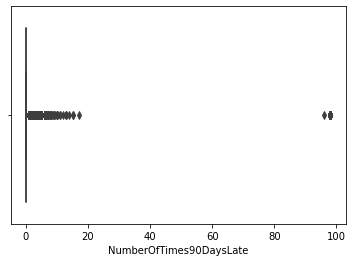

In [52]:
sns.boxplot(df['NumberOfTimes90DaysLate'])

In [53]:
df1 = df[df['NumberOfTimes90DaysLate']<20]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberOfTimes90DaysLate'>

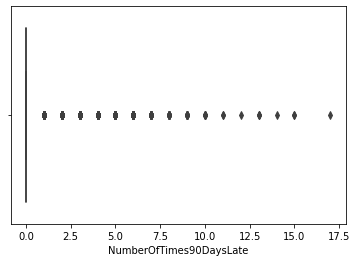

In [54]:
sns.boxplot(df1['NumberOfTimes90DaysLate'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

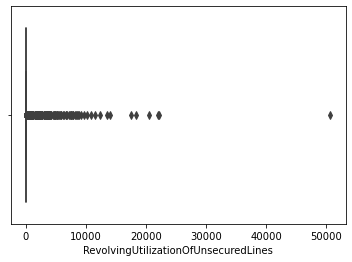

In [55]:
sns.boxplot(df1['RevolvingUtilizationOfUnsecuredLines'])

In [56]:
df1 = df[df['RevolvingUtilizationOfUnsecuredLines']<28000]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

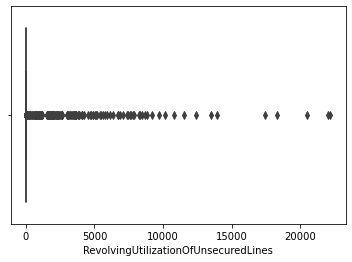

In [57]:
sns.boxplot(df1['RevolvingUtilizationOfUnsecuredLines'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

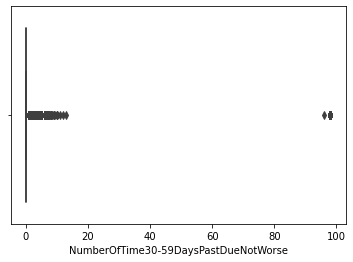

In [58]:
sns.boxplot(df1['NumberOfTime30-59DaysPastDueNotWorse'])

In [59]:
df1 = df[df['NumberOfTime30-59DaysPastDueNotWorse']<20]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

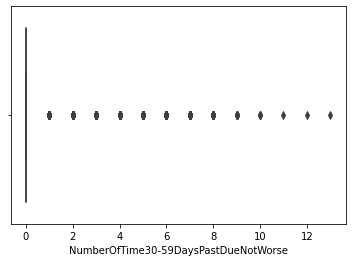

In [60]:
sns.boxplot(df1['NumberOfTime30-59DaysPastDueNotWorse'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DebtRatio'>

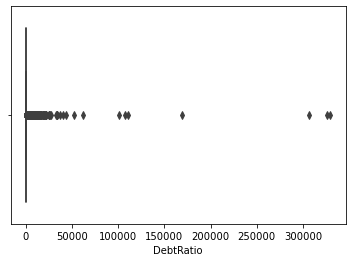

In [61]:
sns.boxplot(df1['DebtRatio'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


80343

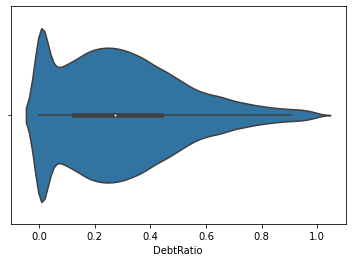

In [102]:
df1 = df[df['DebtRatio']< 1]
sns.violinplot(df1['DebtRatio'])
df1['DebtRatio'].count()


In [101]:
arr = np.array(df1['DebtRatio'])
np.count_nonzero( arr < 1)

80343

In [ ]:
sns.boxplot(df1['NumberOfOpenCreditLinesAndLoans'])

In [ ]:
sns.boxplot(df1['NumberOfTime60-89DaysPastDueNotWorse'])

In [ ]:
df1 = df[df['NumberOfTime60-89DaysPastDueNotWorse']<20]
sns.boxplot(df1['NumberOfTime60-89DaysPastDueNotWorse'])

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df1[['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]
y = df1[['SeriousDlqin2yrs']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 123)
len(x_train)

# **Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc



In [ ]:
log_model.fit(x_train,y_train)

In [ ]:
y_pred_log = log_model.predict(x_test)

In [ ]:
log_model.score(x_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred_log)

# **Desicion Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
tree_model.fit(x_train, y_train)

In [ ]:
y_pred_tree = tree_model.predict(x_test)

In [ ]:
tree_model.score(x_test, y_test)


In [ ]:
confusion_matrix(y_test, y_pred_tree)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_model.score(x_test, y_test)


In [ ]:
y_pred_rf = rf_model.predict(x_test)
confusion_matrix(y_test, y_pred_rf)

# **Prediction Probabilities**

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_model.predict_proba(x_test) [::,1]
tm_probs = tree_model.predict_proba(x_test) [::,1]
lm_probs = log_model.predict_proba(x_test) [::,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
tm_auc = roc_auc_score(y_test, tm_probs)
lm_auc = roc_auc_score(y_test, lm_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Tree Model: AUROC = %.3f' % (tm_auc))
print('Logisitc Model: AUROC = %.3f' % (lm_auc))

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
tm_fpr, tm_tpr, _ = roc_curve(y_test, tm_probs)
lm_fpr, lm_tpr, _ = roc_curve(y_test, lm_probs)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(tm_fpr, tm_tpr, marker='.', label='Tree Model (AUROC = %0.3f)' % tm_auc)
plt.plot(lm_fpr, lm_tpr, marker='.', label='Logisitc Regression (AUROC = %0.3f)' % lm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
test = pd.read_csv('/kaggle/input/classification-loan/test.csv')
test.head(5)

# **Prediction on Tain Data**

In [ ]:
rf_model_final = rf_model.fit(x, y)


In [ ]:
rf_model_final.score(x, y)

In [ ]:
rf_model_final.predict(x)

# **Prediction on Test Data**

In [ ]:
test = pd.read_csv('/kaggle/input/classification-loan/test.csv')
test.head(5)

In [ ]:
test.isnull().sum()

In [ ]:
test['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace = True)
test['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace = True)

In [ ]:
test.isnull().sum()

In [ ]:
test2 =test.drop(['Id'], axis=1)
test2.head(5)

In [ ]:
pred =rf_model_final.predict(test2)
pred

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SeriousDlqin2yrs'] = pred
submission.head(5)

In [ ]:
submission.to_csv('MySubmission', index = False)